## Exploratory Data Analysis for Demand Data

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_initial = pd.read_pickle('./DemandDataFile', compression='infer')
df_region = pd.read_pickle('./RegionDataFile', compression='infer')
df_initial = pd.merge(df_initial, df_region, how='inner', right_on=['CITY_NAME'], left_on=['CITY'])
df_initial = df_initial.drop(['CITY_NAME'], axis=1)
df_initial = df_initial[~df_initial['PRODUCT_NAME'].str.contains("Small Flyers|Large Flyers|Meter Bubble Wrap|Bundle of 50 Boxes", na=False)]
print(df_initial.shape)

(2917531, 21)


In [3]:
df_initial.rename(columns = {'ORDER_DATE':'DATE'},inplace = True)

In [4]:
df_initial[df_initial.CITY == 'Karachi']

,COD_ORDER_NR,SKU,DATE,CATEGORY_LEVEL_1,CATEGORY_LEVEL_2,CATEGORY_LEVEL_3,CATEGORY_LEVEL_4,PRODUCT_NAME,BRAND_NAME,UNIT_PRICE,...,PRODUCT_WEIGHT,CUSTOMER_DEVICE,PAYMENT_OPTION,CTV,Gender,CITY,Voucher,MV,Quantity,REGION_NAME
0,305332633,MA305FA1CS0BSNAFAMZ,2018-03-06,Women's Fashion,Women's Clothing,Lingerie & Sleepwear,Shapewear,Beige Polyester Body Shaper For Women,Mardaz,934.15,...,0.5,Android,COD,1537757,male,Karachi,NaN,934.15,1,Sindh
2,345719922,BO498EL103VHSNAFAMZ,2018-05-06,Phones & Tablets,Phone & Tablet Accessories,Cases & Covers,Android Tablets,Universal 9 Inch Tablet Cover - Brown,Boorak,380.00,...,0.5,Android,COD,1727270,female,Karachi,NaN,380.00,1,Sindh
3,305857193,FR892HB0AR6BQNAFAMZ,2018-02-10,Beauty & Health,Skin Care,Face Masks & Packs,N/A,Facial Purifying Clay Mask Clean Pores & Sooth...,Freeman,405.10,...,0.2,Mobile (Theme),COD,1457029,N/A,Karachi,NaN,405.10,1,Sindh
4,309725313,UM501EL188VKMNAFAMZ,2018-03-04,Phones & Tablets,Phone & Tablet Accessories,Other Accessories,Others,Universal Flexible Mobile Stand - Purple,UMW,137.00,...,0.2,Android,COD,1532585,male,Karachi,NaN,274.00,2,Sindh
5,357171122,NA406FA1DD3G4NAFAMZ,2018-05-22,Men's Fashion,Men's Accessories,Jewellery,Bracelets,Silver Chain Men Bracelet,Naya Rung,145.00,...,0.2,Android,COD,1781749,male,Karachi,13.61,131.39,1,Sindh
6,309755181,SE989SP179JQ8NAFAMZ,2017-12-20,Sports & Travel,Exercise & Fitness,Fitness Supplements & Proteins,Supplements,Cod Liver Oil - 120 Capsules,Seven Seas,1590.00,...,0.5,Mobile (Theme),COD,1314449,N/A,Karachi,NaN,1590.00,1,Sindh
7,306296171,SH564FA0M8IESNAFAMZ,2017-12-27,Men's Fashion,Men's Accessories,Jewellery,Rings,Superman-Batman Stainless Steel Ring - Silver,SHS Gifts,200.00,...,0.2,Mobile (Theme),COD,797253,N/A,Karachi,0.00,200.00,1,Sindh
8,304199261,PE159HB10TROENAFAMZ,2017-12-04,Beauty & Health,Personal Care,Hair Removal Tools,Waxes,Pack Of 2 - Cotton Wax Strip - Large,PeachStore,282.00,...,0.2,Mobile (Theme),COD,1269031,N/A,Karachi,NaN,282.00,1,Sindh
9,392935742,MA889HB1H3W2ANAFAMZ,2018-04-04,Beauty & Health,Makeup,Face,Highlighters,Makeup revolution Liquid Highlighter Liquid Ch...,Makeup Revolution London,1100.00,...,0.2,Desktop,COD,1449947,female,Karachi,NaN,1100.00,1,Sindh
10,306371213,EL555EL0Q8TPCNAFAMZ,2018-02-28,Phones & Tablets,Phone & Tablet Accessories,Cases & Covers,Android Phones,Designer Back Cover for Elephone S7 - FighterJet,Elephone,199.00,...,0.2,Android,COD,1009301,male,Karachi,NaN,199.00,1,Sindh


In [21]:
temp = df_initial.groupby(by=['REGION_NAME'], as_index=False).count()
temp.sort_values('Quantity',ascending=False, inplace = True)
#temp

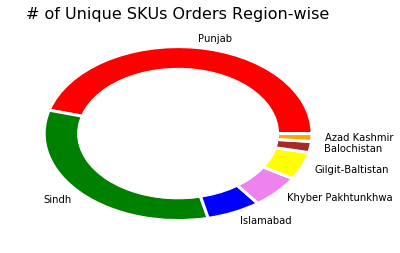

In [22]:
regions = temp['REGION_NAME'][:7]
values = temp['Quantity'][:7]
my_circle=plt.Circle( (0,0), 0.75, color='white')
# Give color names
plt.pie(values, labels=regions, colors=['red','green','blue','violet','yellow','brown','orange'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('# of Unique SKUs Orders Region-wise', fontsize= 16)
plt.show()
 



In [5]:
df_initial.Voucher[df_initial.Voucher > 0] = True
df_initial.Voucher[df_initial.Voucher != True] = False

/home/danyal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_initial.Voucher.value_counts()

False    2524531
True      393000
Name: Voucher, dtype: int64

Text(0.5,1,'Voucher Users Gender Ratio')

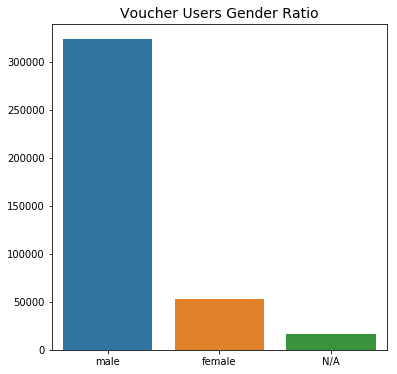

In [25]:
df_initial.Gender[df_initial.Voucher == True].value_counts()
f, ax = plt.subplots(figsize=(6,6))

ax = sns.barplot(x=df_initial.Gender[df_initial.Voucher == True].value_counts().index,
                 y=df_initial.Gender[df_initial.Voucher == True].value_counts().values)
plt.title('Voucher Users Gender Ratio', fontsize=14)


Text(0.5,1,'Gender Level Expenditure Distribution')

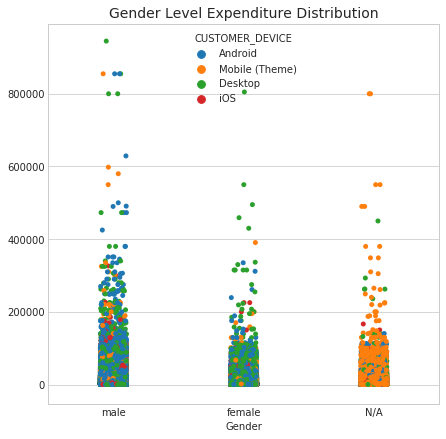

In [26]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(7,7))

#ax = sns.boxplot(x="Voucher", y="Quantity", data=df_initial)
ax = sns.stripplot(x="Gender", y=df_initial.MV/df_initial.Quantity, hue="CUSTOMER_DEVICE", data=df_initial[df_initial.MV <= 1000000],jitter=True)
plt.title('Gender Level Expenditure Distribution', fontsize=14)

#ax = sns.stripplot(dodge=False, x="DSC_CATEGORY_NAME_LEVEL_3", y="OfflineDays", hue="DSC_CATEGORY_NAME_LEVEL_1", data=temp,jitter=True)

In [31]:
#df_initial[df_initial.Voucher == True]['CATEGORY_LEVEL_1'].value_counts()[-10:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

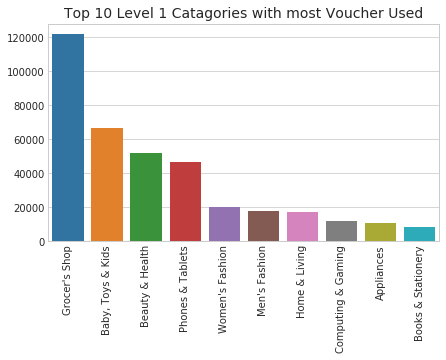

In [27]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=df_initial[df_initial.Voucher == True]['CATEGORY_LEVEL_1'].value_counts()[:10].index,
                 y=df_initial[df_initial.Voucher == True]['CATEGORY_LEVEL_1'].value_counts()[:10].values)
plt.title('Top 10 Level 1 Catagories with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

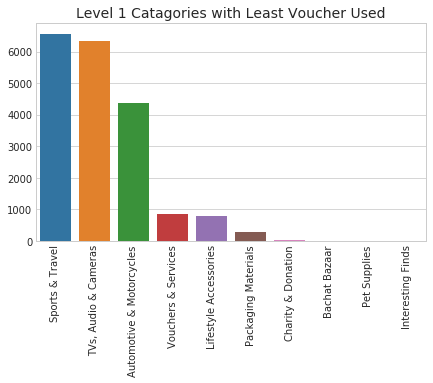

In [28]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=df_initial[df_initial.Voucher == True]['CATEGORY_LEVEL_1'].value_counts()[-10:].index,
                 y=df_initial[df_initial.Voucher == True]['CATEGORY_LEVEL_1'].value_counts()[-10:].values)
plt.title('Level 1 Catagories with Least Voucher Used', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

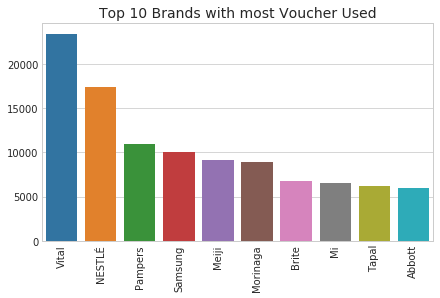

In [29]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=df_initial[df_initial.Voucher == True]['BRAND_NAME'].value_counts()[:10].index,
                 y=df_initial[df_initial.Voucher == True]['BRAND_NAME'].value_counts()[:10].values)
plt.title('Top 10 Brands with most Voucher Used', fontsize=14)
plt.xticks(rotation=90)

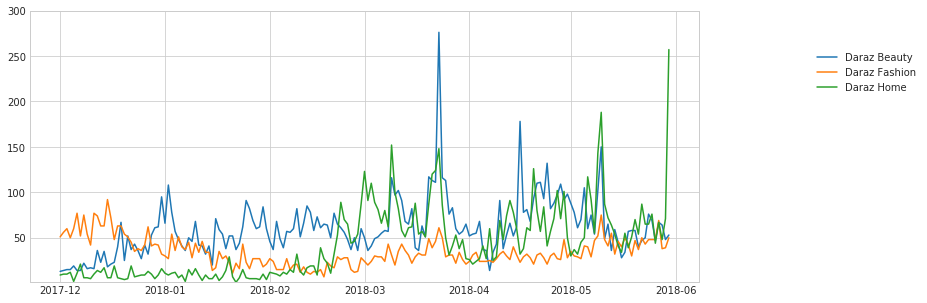

In [34]:
temp = df_initial[df_initial.CITY == 'Lahore'][['DATE','BRAND_NAME','Quantity']].groupby(by=['DATE','BRAND_NAME'])['Quantity'].sum().reset_index()
temp = temp[temp.BRAND_NAME.isin(['Daraz Beauty','Daraz Fashion','Daraz Home'])]

fig, ax = plt.subplots(figsize=(12, 5))
# graph = pd.Series(temp.iloc[:0,-1])
# graph.plot(ax=ax,use_index=False,legend = True)
temp = temp.iloc[:,[0,-1,1]]

ax.plot(temp[temp.BRAND_NAME == 'Daraz Beauty']['DATE'],temp[temp.BRAND_NAME == 'Daraz Beauty']['Quantity'],label="Daraz Beauty")
ax.plot(temp[temp.BRAND_NAME == 'Daraz Fashion']['DATE'],temp[temp.BRAND_NAME == 'Daraz Fashion']['Quantity'],label="Daraz Fashion")
ax.plot(temp[temp.BRAND_NAME == 'Daraz Home']['DATE'],temp[temp.BRAND_NAME == 'Daraz Home']['Quantity'],label="Daraz Home")
#ax.plot(temp[temp.BRAND_NAME == 'Samsung']['DATE'],temp[temp.BRAND_NAME == 'Samsung']['Quantity'],label="Samsung")
ax.set(ylim=(1, 300))
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 0.88), shadow=True, ncol=1)


In [31]:
def CreateLinePlots(dataFrame,Cat1,Cat2,SelectColumnName,ValueList):
    if ValueList!= None:
         dataFrame = dataFrame[dataFrame[SelectColumnName].isin(ValueList)]
    else:
        ValueList = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)][SelectColumnName].value_counts()[:3].index.tolist()
        print(ValueList)
        dataFrame = dataFrame[(dataFrame.CATEGORY_LEVEL_1 == Cat1)
                            & (dataFrame.CATEGORY_LEVEL_2 == Cat2)
                            & (dataFrame[SelectColumnName].isin(ValueList))]
    
    dataFrame = dataFrame[['DATE',SelectColumnName,'Quantity']].groupby(by=['DATE',SelectColumnName])['Quantity'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(12, 5))
    dataFrame = dataFrame.iloc[:,[0,-1,1]]
    for item in ValueList:
        ax.plot(dataFrame[dataFrame[SelectColumnName] == item]['DATE'],dataFrame[dataFrame[SelectColumnName] == item]['Quantity'],label=item)
        
    
    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)


        #temp = dataFrame.groupby(by=['DATE'])['Quantity'].sum().reset_index()
    
    return 0


0

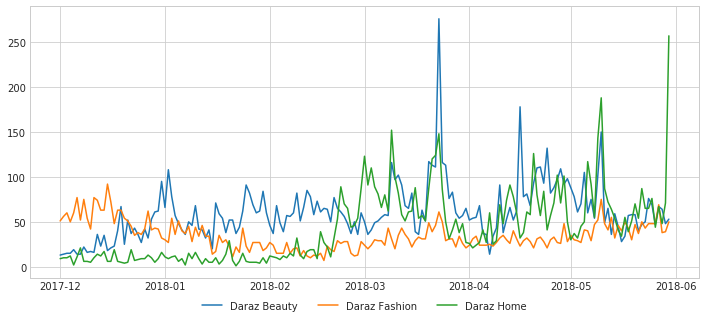

In [35]:
CreateLinePlots(df_initial[df_initial.CITY == 'Lahore'],'Home & Living','Kitchen & Dining','BRAND_NAME',['Daraz Beauty','Daraz Fashion','Daraz Home'])

In [19]:
df_initial['WEEKDAY'] = df_initial['DATE'].apply(lambda x:calendar.day_name[x.weekday()])
df_initial['MONTH'] = df_initial['DATE'].apply(lambda x:calendar.month_abbr[x.month])


In [20]:
temp = df_initial.groupby(by=['MONTH'], as_index=False)['Quantity'].sum()
temp['Assortment% Demand'] = ((temp.Quantity/df_initial.Quantity.sum())*100).round(decimals = 1)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
temp['MONTH'] = pd.Categorical(temp['MONTH'], categories=months, ordered=True)
temp.sort_values('MONTH',ascending=True, inplace = True)
temp

,MONTH,Quantity,Assortment% Demand
3,Jan,1268768,21.6
2,Feb,1417463,24.2
4,Mar,1117936,19.1
0,Apr,699939,11.9
5,May,835091,14.2
1,Dec,524132,8.9


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

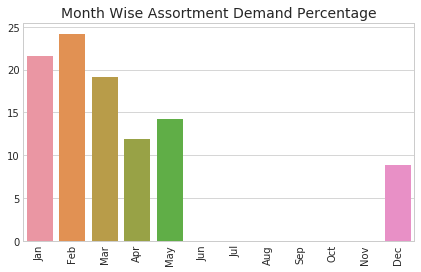

In [38]:
f, ax = plt.subplots(figsize=(7,4))

ax = sns.barplot(x=temp['MONTH'].values,
                 y=temp['Assortment% Demand'].values)
plt.title('Month Wise Assortment Demand Percentage', fontsize=14)
plt.xticks(rotation=90)

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/danyal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/danyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danyal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
import os
from functools import partial
import spacy as spacy #load spacy
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import os
import string
from spacy.lang.en import English

nlp = spacy.load('en')
stops = stopwords.words("english")
punctuations = string.punctuation

parser = English()

def normalize(comment, lowercase, remove_stopwords):
        #comment = df_initial[df_initial.SKU == key]['PRODUCT_NAME'].unique()[0]
        key = comment.split('-*-')[0]
        comment = comment.split('-*-')[1]
        if lowercase:
            comment = comment.lower()
        comment = nlp(comment)
        lemmatized = list()
        for word in comment:
            lemma = word.lemma_.strip()
            if lemma:
                if not remove_stopwords or (len(lemma) > 2 and remove_stopwords and lemma not in stops and lemma not in punctuations):
                    lemmatized.append(lemma)
        return (key," ".join(lemmatized))

#mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)

def dask_tokenizer(df):
    df_initial['PRODUCT_STEMMED'] = list(map(mapfunc, df_initial['PRODUCT_NAME']))
    return df_initial

In [165]:
if os.path.exists('./ProcessedDemandDataFile'):
    cleanedProductNames = pd.read_pickle('./ProcessedDemandDataFile', compression='infer')
    cleanedProductNames.columns = ['SKU','PRODUCT_STEMMED']
    df_initial = pd.merge(df_initial, cleanedProductNames, how='inner')
    print('File Found')
else:
    df_initial['PRODUCT_STEMMED'] = 'Null'
    print('File Not Found..Creating')
    mapfunc = partial(normalize, lowercase=True,remove_stopwords=True)
    #df_initial[['SKU','PRODUCT_NAME']].apply(lambda x: '--'.join(x.str.strip()), axis=1)
    %time temp = df_initial['SKU'].map(str)+'-*-'+df_initial['PRODUCT_NAME'].map(str)
    %time cleanedProductNames = list(temp.drop_duplicates().apply(normalize, lowercase=True, remove_stopwords=True))
    pd.DataFrame(cleanedProductNames).to_pickle('./ProcessedDemandDataFile',compression='infer', protocol=4)

File Found


In [29]:
def generateWordCloud(text,maxWords,title):
    wordcloud = WordCloud(max_font_size=40,max_words=maxWords,colormap="Dark2",background_color="green").generate(text)
    plt.subplots(figsize=(10,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title,fontsize=18)
    plt.axis("off")
    plt.show()

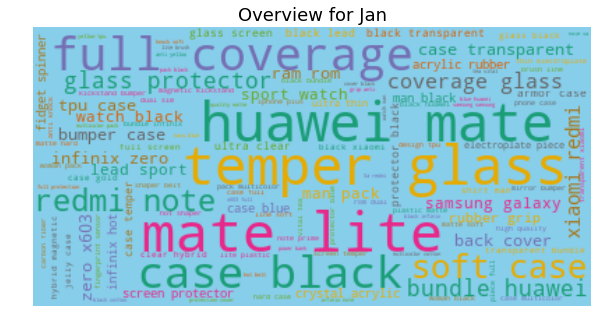

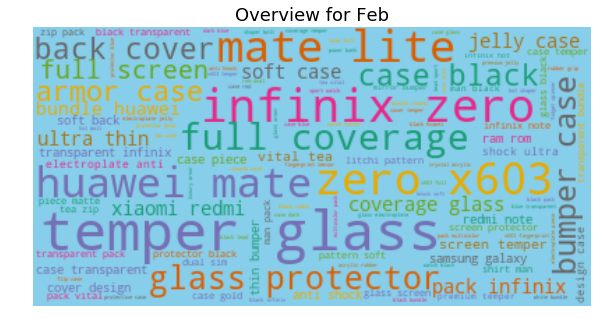

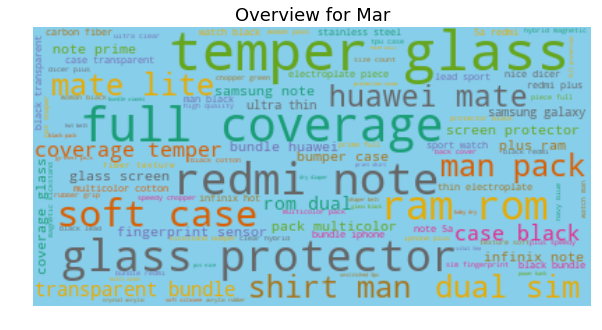

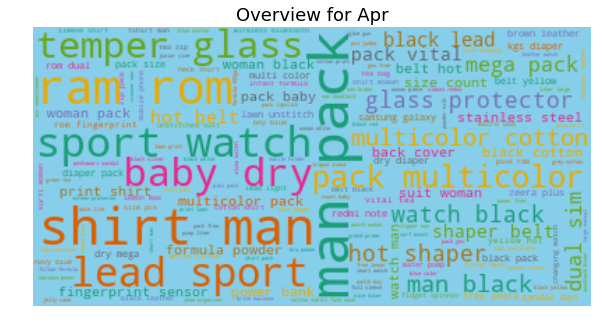

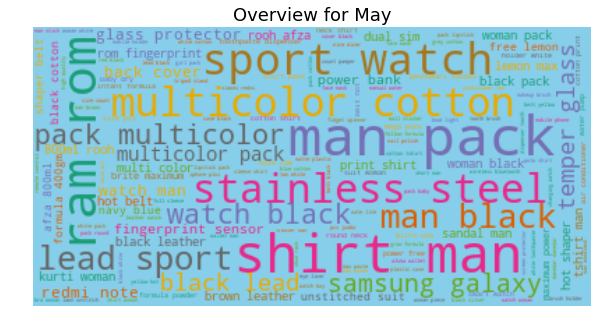

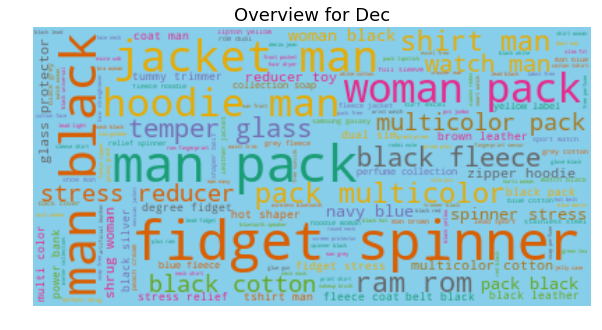

In [25]:
from wordcloud import WordCloud
for x in months:
    temp = df_initial[df_initial.MONTH == x]
    if temp.shape[0] > 0:
        allText = ', '.join(temp.PRODUCT_STEMMED)
        generateWordCloud(allText,200,'Overview for ' + x)

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]),
 <a list of 12 Text xticklabel objects>)

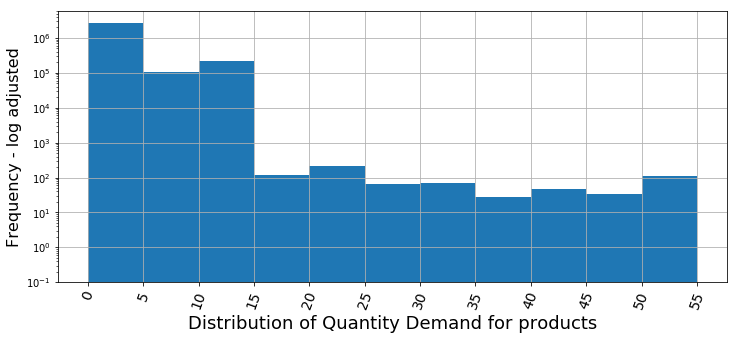

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
bins = np.arange(0,60,5)
df_initial['Quantity'].hist(ax=ax, bins=bins, bottom=0.1)
 
ax.set_yscale('log')
plt.xticks(range(0, 60, 5), fontsize=14)
plt.xlabel('Distribution of Quantity Demand for products', fontsize=18)
plt.ylabel('Frequency - log adjusted', fontsize=16)
plt.xticks(rotation=70)


In [28]:
pd.Series((df_initial.Quantity == 20)).value_counts()[1]

129